# Example 01 - page 16 book

In [1]:
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt
import theano

In [2]:
y = np.array([13,15,9,17,8,5,19,23,10,7,10,6]) # response variable

In [3]:
x1 = np.array([1,1,1,1,1,1,0,0,0,0,0,0]) # binary predictor

In [4]:
x2 = np.array([1,1,1,1,2,2,2,2,3,3,3,3]) # categorical predictor

In [5]:
my_data = {}
my_data['x1'] = x1
my_data['x2'] = x2

In [6]:
results = smf.ols(formula='y~x1+x2', data=my_data).fit()

In [7]:
print (str(results.summary()))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     14.51
Date:                Thu, 14 Sep 2017   Prob (F-statistic):            0.00153
Time:                        21:22:08   Log-Likelihood:                -28.579
No. Observations:                  12   AIC:                             63.16
Df Residuals:                       9   BIC:                             64.61
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     38.8333      5.090      7.630      0.0

/usr/local/lib/python2.7/dist-packages/scipy/stats/stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


In [8]:
fig, ax = plt.subplots()
fig = sm.graphics.plot_fit(results, 0, ax=ax)

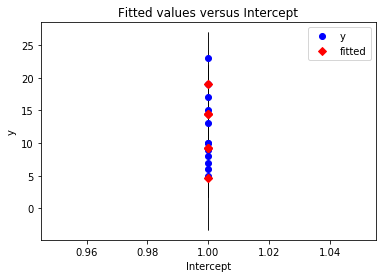

In [9]:
plt.show()

# Example 02 - page 41 book

In [10]:
import pymc3 as pm
import pandas as pd
import scipy.stats as ss

In [11]:
np.random.seed(1056)
n_obs = 250
alpha = 2.
beta = 3.
x1 = ss.uniform.rvs(size=n_obs)
xb = alpha + beta*x1
y = ss.norm.rvs(loc=xb, scale=1., size=n_obs)

In [12]:
my_dataframe = pd.DataFrame({'x1': x1, 'y': y})

In [13]:
with pm.Model() as model_glm:
    pm.glm.GLM.from_formula('y ~ x1', my_dataframe)
    trace = pm.sample(5000)

Auto-assigning NUTS sampler...
Initializing NUTS using ADVI...
Average Loss = 359.48:   9%|▊         | 17095/200000 [00:01<00:16, 11415.43it/s]
Convergence archived at 17100
Interrupted at 17,100 [8%]: Average Loss = 786.15
100%|██████████| 5500/5500 [00:05<00:00, 998.06it/s] 


In [14]:
pm.summary(trace)


Intercept:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  2.038            0.128            0.003            [1.784, 2.276]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  1.788          1.951          2.039          2.125          2.281


x1:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  3.139            0.219            0.005            [2.694, 3.536]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  2.711          2.991          3.138          3.286          3.562


sd:

  Mean             SD               MC Error         95% HPD interval
  ---------------------------

In [15]:
print trace.stat_names

set(['max_energy_error', 'mean_tree_accept', 'diverging', 'step_size_bar', 'energy', 'energy_error', 'tree_size', 'depth', 'step_size', 'tune'])


In [16]:
print trace.varnames

['Intercept', 'x1', 'sd_log__', 'sd']


In [17]:
print trace['x1'].size

5000


In [18]:
print np.mean(trace['Intercept'])

2.03785401583


In [19]:
pm.summary??

In [20]:
pm.traceplot(trace)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7dea964350>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f7de8a26650>]], dtype=object)

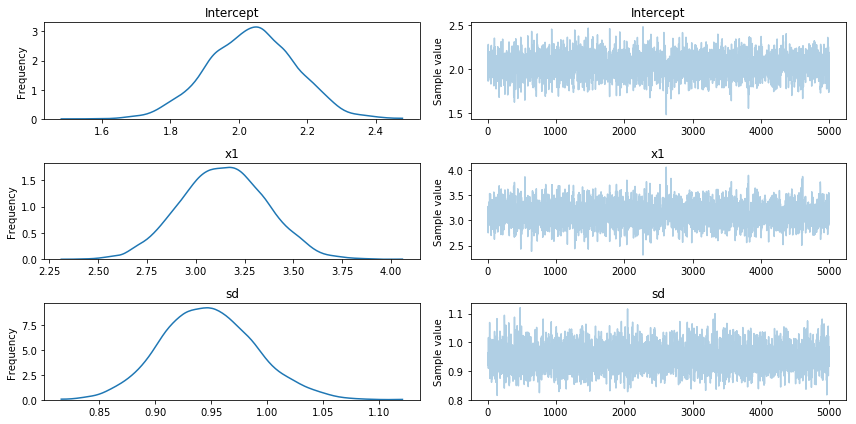

In [21]:
plt.show()

In [22]:
# plt.figure(figsize=(7, 5))
# plt.plot(x1, y, 'x', label='data')
# pm.plot_posterior_predictive_glm(trace, samples=50)
# plt.show()
# # plt.plot(x1, true_regression_line,
# #           label='true regression line', lw=3., c='y')

# # plt.legend(loc=0);

In [ ]:
with pm.Model() as model_glm:
    family = pm.glm.families.StudentT()
    pm.glm.GLM.from_formula('y ~ x1', my_dataframe)
    trace_robust = pm.sample(100, njobs=100)

plt.figure(figsize=(7, 5))
plt.plot(x1, y)
pm.plot_posterior_predictive_glm(trace, samples=200, family=family,
                                 label='posterior predictive regression lines')
# plt.plot(x1, true_regression_line,
#          label='true regression line', lw=3., c='y')
plt.legend();
plt.show()

Auto-assigning NUTS sampler...
Initializing NUTS using ADVI...
Average Loss = 361:   8%|▊         | 16250/200000 [00:01<00:19, 9461.08it/s]   
Convergence archived at 17100
Interrupted at 17,100 [8%]: Average Loss = 786.15
 97%|█████████▋| 583/600 [00:01<00:00, 262.93it/s]/usr/local/lib/python2.7/dist-packages/pymc3/step_methods/hmc/nuts.py:418: UserWarning: Chain 0 contains only 100 samples.
  % (self._chain_id, n))

100%|██████████| 600/600 [00:02<00:00, 295.55it/s]/usr/local/lib/python2.7/dist-packages/pymc3/step_methods/hmc/nuts.py:418: UserWarning: Chain 1 contains only 100 samples.
  % (self._chain_id, n))
/usr/local/lib/python2.7/dist-packages/pymc3/step_methods/hmc/nuts.py:418: UserWarning: Chain 2 contains only 100 samples.
  % (self._chain_id, n))
/usr/local/lib/python2.7/dist-packages/pymc3/step_methods/hmc/nuts.py:418: UserWarning: Chain 3 contains only 100 samples.
  % (self._chain_id, n))


# Example of: http://docs.pymc.io/notebooks/GLM-robust.html

In [24]:
size = 100
true_intercept = 1
true_slope = 2

x = np.linspace(0, 1, size)
# y = a + b*x
true_regression_line = true_intercept + true_slope * x
# add noise
y = true_regression_line + np.random.normal(scale=.5, size=size)

# Add outliers
x_out = np.append(x, [.1, .15, .2])
y_out = np.append(y, [8, 6, 9])

data = dict(x=x_out, y=y_out)

In [25]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, xlabel='x', ylabel='y', title='Generated data and underlying model')
ax.plot(x_out, y_out, 'x', label='sampled data')
ax.plot(x, true_regression_line, label='true regression line', lw=2.)
plt.legend(loc=0);

In [26]:
with pm.Model() as model:
    pm.glm.GLM.from_formula('y ~ x', data)
    trace = pm.sample(2000, njobs=2)

Auto-assigning NUTS sampler...
Initializing NUTS using ADVI...
Average Loss = 180.63:   6%|▌         | 11781/200000 [00:01<00:20, 9403.05it/s]
Convergence archived at 11900
Interrupted at 11,900 [5%]: Average Loss = 268.31
100%|██████████| 2500/2500 [00:04<00:00, 522.09it/s]


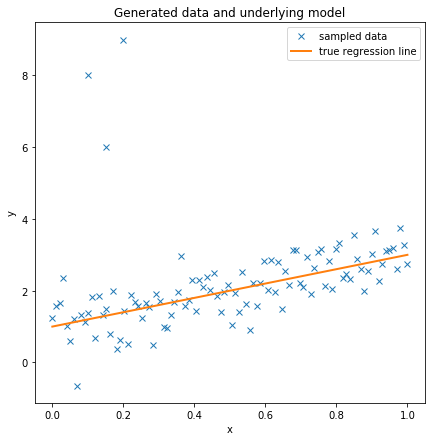

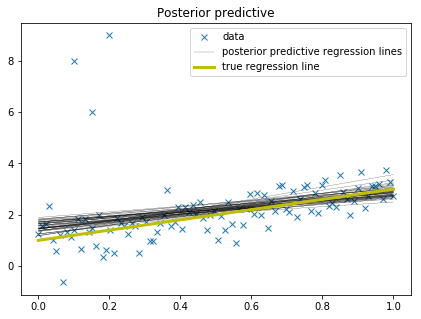

In [27]:
plt.figure(figsize=(7, 5))
plt.plot(x_out, y_out, 'x', label='data')
pm.plot_posterior_predictive_glm(trace, samples=50,
                                 label='posterior predictive regression lines')
plt.plot(x, true_regression_line,
         label='true regression line', lw=3., c='y')

plt.legend(loc=0);
plt.show()

In [30]:
sm.families.Binomial?